In [134]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)

In [135]:
#viewing dataset
player_stats<-read_csv("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS")
player_stats


Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  `Turned Pro` = col_double(),
  Seasons = col_double(),
  Titles = col_double(),
  `Best Season` = col_double(),
  Retired = col_double(),
  Masters = col_double(),
  `Grand Slams` = col_double(),
  `Davis Cups` = col_double(),
  `Team Cups` = col_double(),
  Olympics = col_double(),
  `Weeks at No. 1` = col_double(),
  `Tour Finals` = col_double()
)

See spec(...) for full column specifications.



X1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
497,23 (14-03-1996),Netherlands,Left-handed,Wikipedia,495 (60),342 (05-08-2019),Gijs Brouwer,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
498,24 (17-05-1995),Ukraine,NA,Wikipedia,419 (81),419 (20-01-2020),Vladyslav Orlov,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
499,22 (26-03-1997),Tunisia,Left-handed,Wikipedia,451 (69),408 (24-12-2018),Aziz Dougaz,Two-handed,"$61,984",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Rows: 394
Columns: 44
$ X1                   <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 1…
$ Age                  <dbl> 18, 32, 21, 27, 22, 28, 21, 25, 20, 19, 28, 23, …
$ DOB                  <chr> "(22-12-2001)", "(03-11-1987)", "(29-05-1998)", …
$ Country              <chr> "United Kingdom", "Slovakia", "Korea, Republic o…
$ Plays                <chr> "Left-handed", "Right-handed", "Right-handed", "…
$ Wikipedia            <chr> "Wikipedia", "Wikipedia", "Wikipedia", "Wikipedi…
$ Current.Rank         <dbl> 326, 178, 236, 183, 31, 307, 232, 417, 104, 22, …
$ Current.Points       <dbl> 119, 280, 199, 273, 1398, 131, 205, 81, 534, 170…
$ Best.Rank            <dbl> 316, 44, 130, 17, 31, 213, 229, 253, 104, 17, 14…
$ Best.Rank.Date       <chr> "(14-10-2019)", "(14-01-2013)", "(10-04-2017)", …
$ Name                 <chr> "Jack Draper", "Lukas Lacko", "Duck Hee Lee", "B…
$ Backhand             <chr> "Two-handed", "Two-handed", "Two-handed", "Two-h…
$ Prize.Money          <dbl> 5

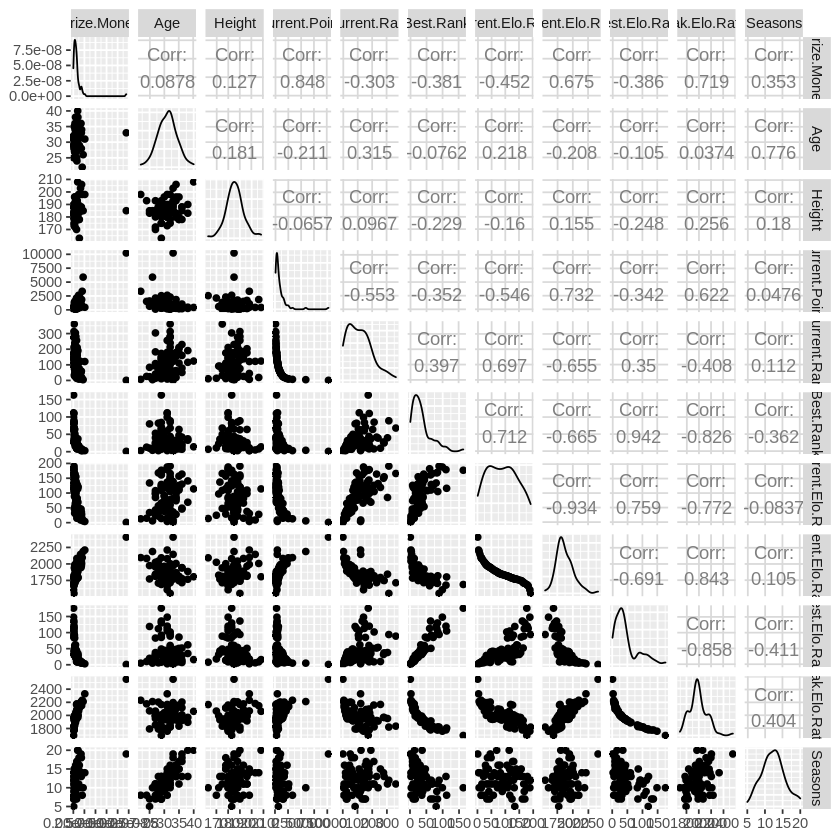

In [136]:
#---TIDYING DATA---

colnames(player_stats) <- make.names(colnames(player_stats)) #Removing spaces from column names

#Removing useless characters in different cells
player_stats$Prize.Money<-gsub("\\$","",as.character(player_stats$Prize.Money))
player_stats$Prize.Money<-gsub("US","",as.character(player_stats$Prize.Money))
player_stats$Prize.Money<-gsub("\\$ ","",as.character(player_stats$Prize.Money))
player_stats$Prize.Money<-gsub(",","",as.character(player_stats$Prize.Money))
player_stats$Prize.Money<-gsub(" .*","",as.character(player_stats$Prize.Money))
player_stats$Current.Rank<-gsub("\\(","",as.character(player_stats$Current.Rank))
player_stats$Current.Rank<-gsub("\\)","",as.character(player_stats$Current.Rank))
player_stats$Current.Elo.Rank<-gsub("\\)","",as.character(player_stats$Current.Elo.Rank))
player_stats$Current.Elo.Rank<-gsub("\\(","",as.character(player_stats$Current.Elo.Rank))
player_stats$Height<-gsub("cm","",as.character(player_stats$Height))

#Separating cells with more than one value in them
player_stats_tidy <- player_stats%>%
    separate(col = Age, into = c("Age", "DOB"),sep = " ") %>%
    separate(col = Best.Rank, into = c("Best.Rank", "Best.Rank.Date"), sep = " ") %>%
    separate(col = Best.Elo.Rank, into = c("Best.Elo.Rank", "Best.Elo.Rank.Date"), sep = " ") %>%
    separate(col = Peak.Elo.Rating, into = c("Peak.Elo.Rating", "Peak.Elo.Rating.Date"), sep = " ") %>%
    separate(col = Current.Elo.Rank,into = c("Current.Elo.Rank", "Current.Elo.Rating"), sep = " ") %>%
    separate(col = Current.Rank,into = c("Current.Rank", "Current.Points"), sep = " ")

#Changing column names into doubles
player_stats_tidy$Prize.Money<-as.numeric(player_stats_tidy$Prize.Money)
player_stats_tidy$Age<-as.numeric(player_stats_tidy$Age)
player_stats_tidy$Height<-as.numeric(player_stats_tidy$Height)
player_stats_tidy$Best.Rank<-as.numeric(player_stats_tidy$Best.Rank)
player_stats_tidy$Best.Elo.Rank<-as.numeric(player_stats_tidy$Best.Elo.Rank)
player_stats_tidy$Peak.Elo.Rating<-as.numeric(player_stats_tidy$Peak.Elo.Rating)
player_stats_tidy$Current.Elo.Rank<-as.numeric(player_stats_tidy$Current.Elo.Rank)
player_stats_tidy$Current.Elo.Rating<-as.numeric(player_stats_tidy$Current.Elo.Rating)
player_stats_tidy$Current.Rank<-as.numeric(player_stats_tidy$Current.Rank)
player_stats_tidy$Current.Points<-as.numeric(player_stats_tidy$Current.Points)
player_stats_tidy$Seasons<-as.numeric(player_stats_tidy$Seasons)
player_stats_tidy <- player_stats_tidy[complete.cases(player_stats_tidy[, "Prize.Money"]),] # Omit NAs in Prize.Money


glimpse(player_stats_tidy)

ggpair_plot

#---SORTING DATA---

#setting seed. DO NOT REMOVE OR SET SEED ELSEWHERE
set.seed(2022) 

#Removing columnns without numerical values
predictors = c("Age","Height", "Current.Points", "Current.Rank", "Best.Rank", "Current.Elo.Rank", "Current.Elo.Rating", "Best.Elo.Rank", "Peak.Elo.Rating", "Seasons")
player_stats_num<-player_stats_tidy %>%
    select(Prize.Money, all_of(predictors))

#Visualizing data on all possible predictors
ggpair_plot<-player_stats_num%>%
            na.omit()%>%
            ggpairs()


The following factors have a high correlation (|correlation|>0.9):  
Current Elo Rank & Current Elo Rating  
Best Elo Rank & Peak Elo Rating  
This makes sense since they mean the same thing. Rating will be kept over Rank since it gives more information. 

Rows: 215
Columns: 5
$ Prize.Money     <dbl> 3261567, 6091971, 1517157, 122734, 1893476, 303458, 2…
$ Age             <dbl> 32, 27, 22, 25, 19, 28, 31, 20, 22, 33, 32, 30, 30, 3…
$ Current.Points  <dbl> 280, 273, 1398, 81, 1701, 359, 460, 959, 1335, 417, 1…
$ Peak.Elo.Rating <dbl> 1886, 2037, 1983, 1603, 1992, 1744, 2329, 1908, 1999,…
$ Seasons         <dbl> 14, 11, 5, 5, 3, 8, 14, 3, 6, 14, 15, 7, 7, 3, 16, 11…


  Prize.Money            Age        Current.Points   Peak.Elo.Rating
 Min.   :    4416   Min.   :18.00   Min.   :  66.0   Min.   :1563   
 1st Qu.:  699210   1st Qu.:25.00   1st Qu.: 202.0   1st Qu.:1784   
 Median : 1453933   Median :28.00   Median : 405.0   Median :1867   
 Mean   : 3426122   Mean   :28.08   Mean   : 665.6   Mean   :1887   
 3rd Qu.: 4598046   3rd Qu.:32.00   3rd Qu.: 810.0   3rd Qu.:1970   
 Max.   :25889586   Max.   :40.00   Max.   :5890.0   Max.   :2329   
    Seasons      
 Min.   : 2.000  
 1st Qu.: 5.000  
 Median : 8.000  
 Mean   : 8.736  
 3rd Qu.:11.500  
 Max.   :21.000  

Rows: 163
Columns: 5
$ Prize.Money     <dbl> 3261567, 122734, 303458, 25889586, 1285541, 11912152,…
$ Age             <dbl> 32, 25, 28, 31, 20, 32, 30, 30, 32, 29, 25, 28, 32, 2…
$ Current.Points  <dbl> 280, 81, 359, 460, 959, 1100, 528, 138, 2310, 1516, 6…
$ Peak.Elo.Rating <dbl> 1886, 1603, 1744, 2329, 1908, 2068, 1850, 1696, 2112,…
$ Seasons         <dbl> 14, 5, 8, 14, 3, 15, 7, 7, 16, 11, 5, 8, 13, 11, 8, 1…


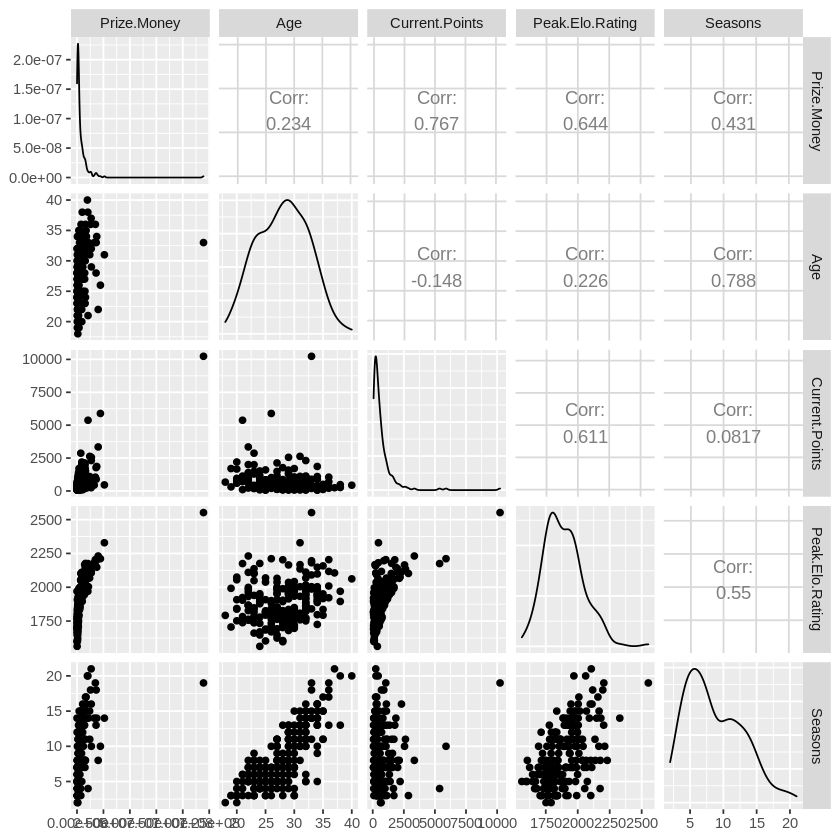

In [137]:
#select best predictors
selected_predictors = c("Age", "Current.Points", "Peak.Elo.Rating", "Seasons")

#select best predictors columns and remove NAs
player_stats_short = player_stats_num%>%
                    select(Prize.Money, all_of(selected_predictors)) %>%
                    na.omit()

#Visualizing data
glimpse(player_stats_short)

ggpair_plot_2<-player_stats_short%>%
    ggpairs()

ggpair_plot_2

#Splitting data into training and testing sets
player_stats_split <- initial_split(player_stats_short, prop = 0.75, strata = Prize.Money)
player_stats_training <- training(player_stats_split)
player_stats_testing <- testing(player_stats_split)

#Summarizing data
summary_table = player_stats_training %>%
                summary()
summary_table

glimpse(player_stats_training)

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,2.427506e+06,5,3.287299e+05,Model01
1,rsq,standard,7.172054e-01,5,7.058413e-02,Model01
2,rmse,standard,2.272311e+06,5,3.313301e+05,Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
49,rsq,standard,7.254207e-01,5,4.730459e-02,Model49
50,rmse,standard,3.220229e+06,5,3.196924e+05,Model50
50,rsq,standard,7.255855e-01,5,4.885561e-02,Model50


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
4,rmse,standard,2116777,5,287060.1,Model04


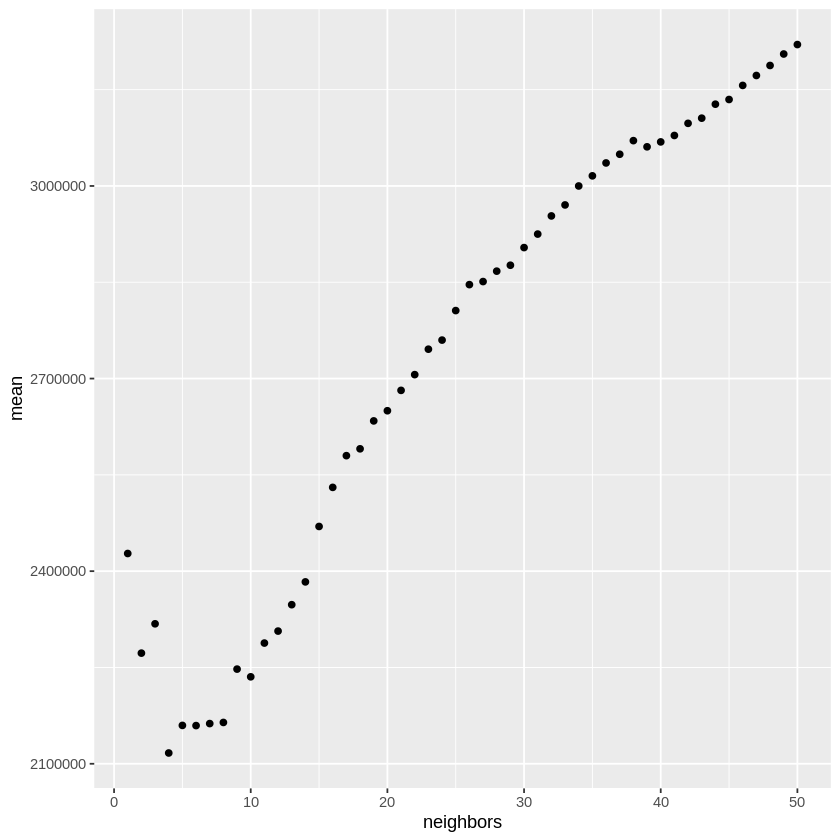

In [138]:
set.seed(1234) 

#create a knn model with training data and choose the best k
player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
       set_engine("kknn") %>%
       set_mode("regression") 

player_recipe <- recipe(Prize.Money ~ ., data = player_stats_training) %>%
       step_scale(all_predictors()) %>%
       step_center(all_predictors())

player_vfold = vfold_cv(player_stats_training, v = 5, strata = Prize.Money)

player_workflow = workflow() %>%
       add_recipe(player_recipe) %>%
        add_model(player_spec)

gridvals = tibble(neighbors = seq(1, 50))

player_results = player_workflow %>%
                    tune_grid(resamples = player_vfold, grid = gridvals) %>%
                    collect_metrics() 
player_results

#compare the rmse of k
player_k_graph<-player_results%>%
    filter(.metric=="rmse")%>%
    select(neighbors,mean)%>%
    ggplot(aes(x=neighbors, y=mean))+
        geom_point()

player_k_graph

#choose the best k
player_min <- player_results %>%
    filter(.metric == "rmse") %>%
    arrange(mean) %>% 
    slice(1)

player_min

In [139]:
#apply knn model with best k to the testing data
k_min <- player_min %>%
          pull(neighbors)

player_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
          set_engine("kknn") %>%
          set_mode("regression")

player_best_fit <- workflow() %>%
          add_recipe(player_recipe) %>%
          add_model(player_best_spec) %>%
          fit(data = player_stats_training)

player_estimate <- player_best_fit %>%
           predict(player_stats_testing) %>%
           bind_cols(player_stats_testing) 

head(player_estimate)

player_summary<- player_estimate%>%
           metrics(truth = Prize.Money, estimate = .pred)

player_summary

.pred,Prize.Money,Age,Current.Points,Peak.Elo.Rating,Seasons
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4656999.8,6091971,27,273,2037,11
2533063.0,1517157,22,1398,1983,5
2671118.5,1893476,19,1701,1992,3
2048132.5,2722314,22,1335,1999,6
4168125.0,10821168,33,417,2004,14
894810.2,631094,30,442,1721,3


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.446402e+07
rsq,standard,4.417984e-01
mae,standard,3.031663e+06


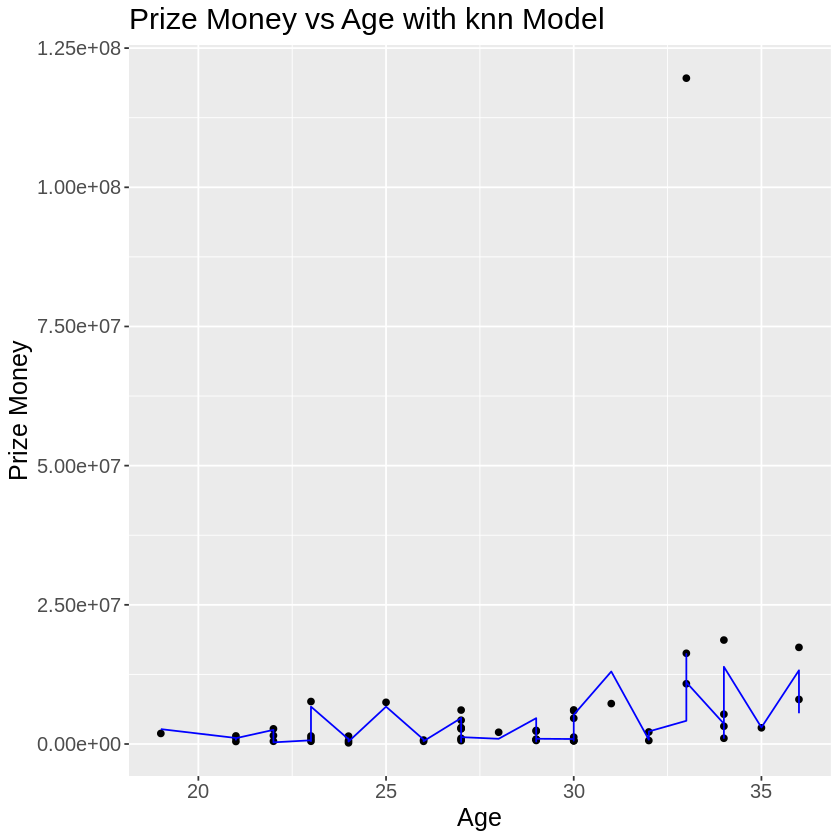

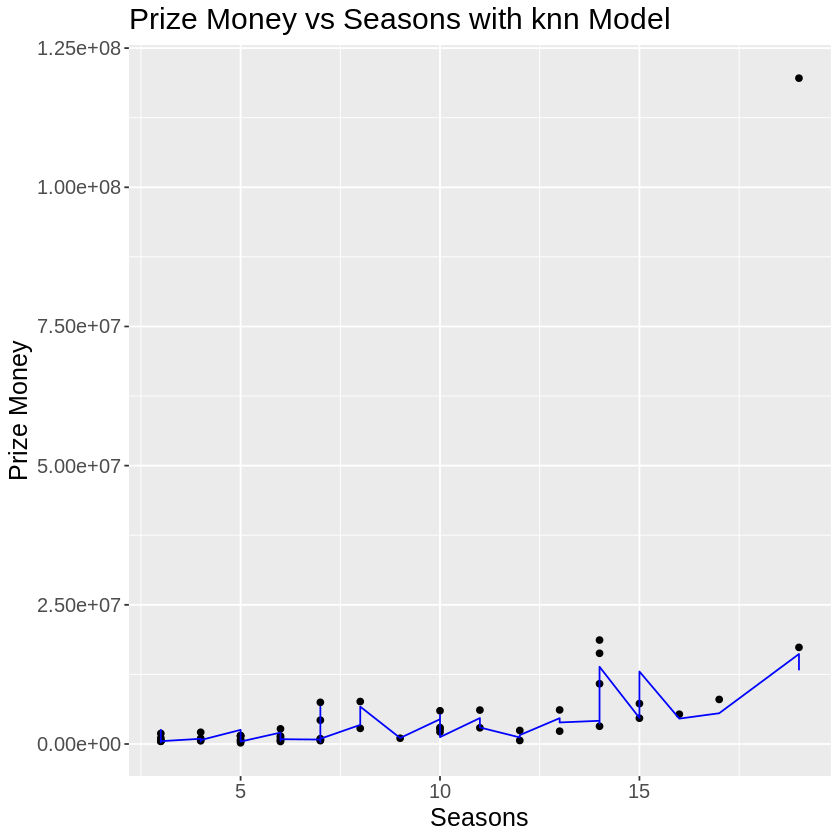

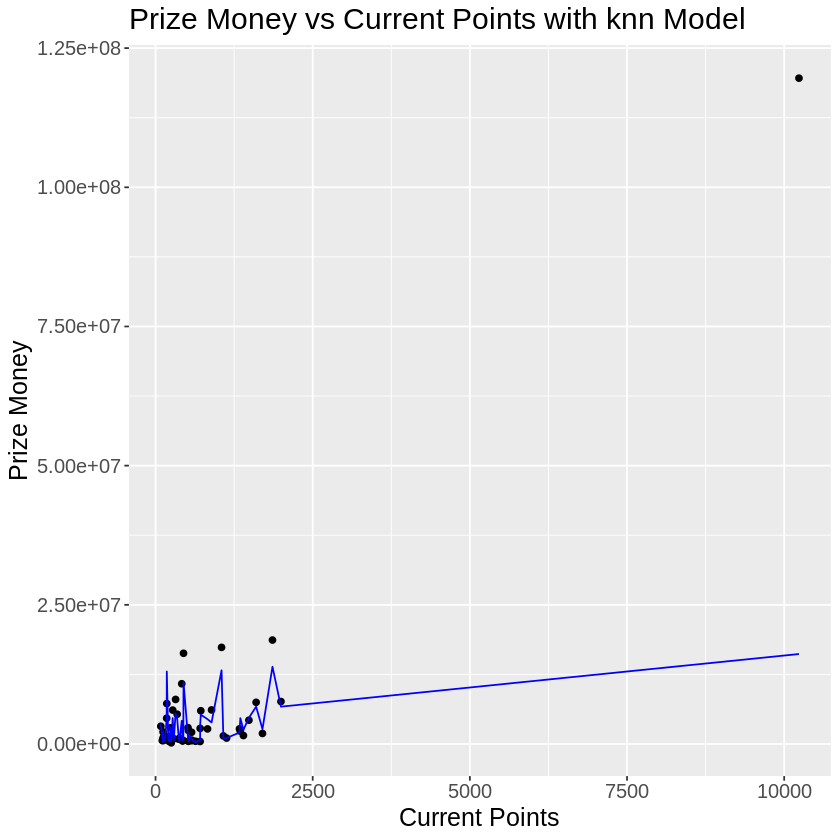

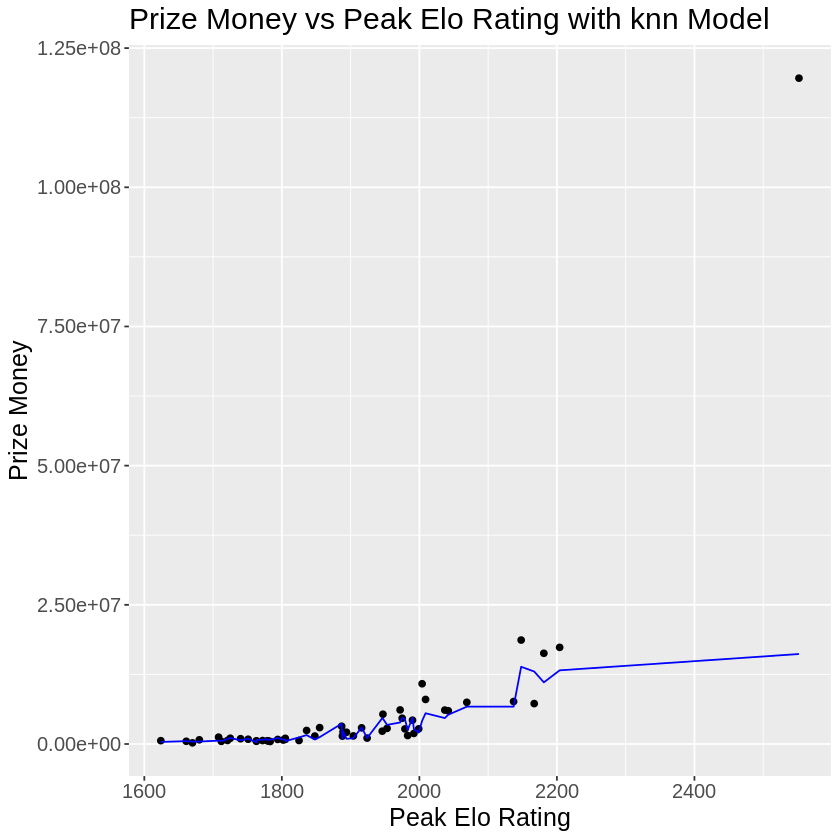

In [140]:
#Visualizing knn regression model on testing set

Age_knn_plot = ggplot(player_estimate, aes(x=Age, y = Prize.Money))+
                geom_point()+
                geom_line(mapping = aes(x=Age, y = .pred), color = "blue")+
                labs(x="Age", y ="Prize Money", title = "Prize Money vs Age with knn Model") +
                theme(text = element_text(size = 15))
Age_knn_plot

Seasons_knn_plot = ggplot(player_estimate, aes(x=Seasons, y = Prize.Money))+
                geom_point()+
                geom_line(mapping = aes(x=Seasons, y = .pred), color = "blue")+
                labs(x="Seasons", y ="Prize Money", title = "Prize Money vs Seasons with knn Model")+
                theme(text = element_text(size = 15))
Seasons_knn_plot

Current_Points_knn_plot = ggplot(player_estimate, aes(x=Current.Points, y = Prize.Money))+
                geom_point()+
                geom_line(mapping = aes(x=Current.Points, y = .pred), color = "blue")+
                labs(x="Current Points", y ="Prize Money", title = "Prize Money vs Current Points with knn Model")+
                theme(text = element_text(size = 15))
Current_Points_knn_plot

Peak_Elo_Rating_knn_plot = ggplot(player_estimate, aes(x=Peak.Elo.Rating, y = Prize.Money))+
                geom_point()+
                geom_line(mapping = aes(x=Peak.Elo.Rating, y = .pred), color = "blue")+
                labs(x="Peak Elo Rating", y ="Prize Money", title = "Prize Money vs Peak Elo Rating with knn Model")+
                theme(text = element_text(size = 15))
Peak_Elo_Rating_knn_plot

In [141]:
#apply linear regression model
lm_spec<-linear_reg()%>%
    set_engine("lm")%>%
    set_mode("regression")

lm_recipe<-recipe(Prize.Money~., data=player_stats_training)
    
lm_fit<-workflow()%>%
    add_recipe(lm_recipe)%>%
    add_model(lm_spec)%>%
    fit(player_stats_training)

lm_fit

lm_test_table <- lm_fit %>%
        predict(player_stats_testing) %>%
        bind_cols(player_stats_testing) 

lm_test_results<- lm_test_table%>%
    metrics(truth = Prize.Money, estimate = .pred)

lm_test_results

lm_rmspe <- lm_test_results %>%
         filter(.metric=='rmse') %>%
         select(.estimate) %>%
         pull()

lm_rmspe

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
    (Intercept)              Age   Current.Points  Peak.Elo.Rating  
      -30210098            14873             1553            15523  
        Seasons  
         331702  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.234817e+07
rsq,standard,7.369684e-01
mae,standard,3.332913e+06


[1] 12348165

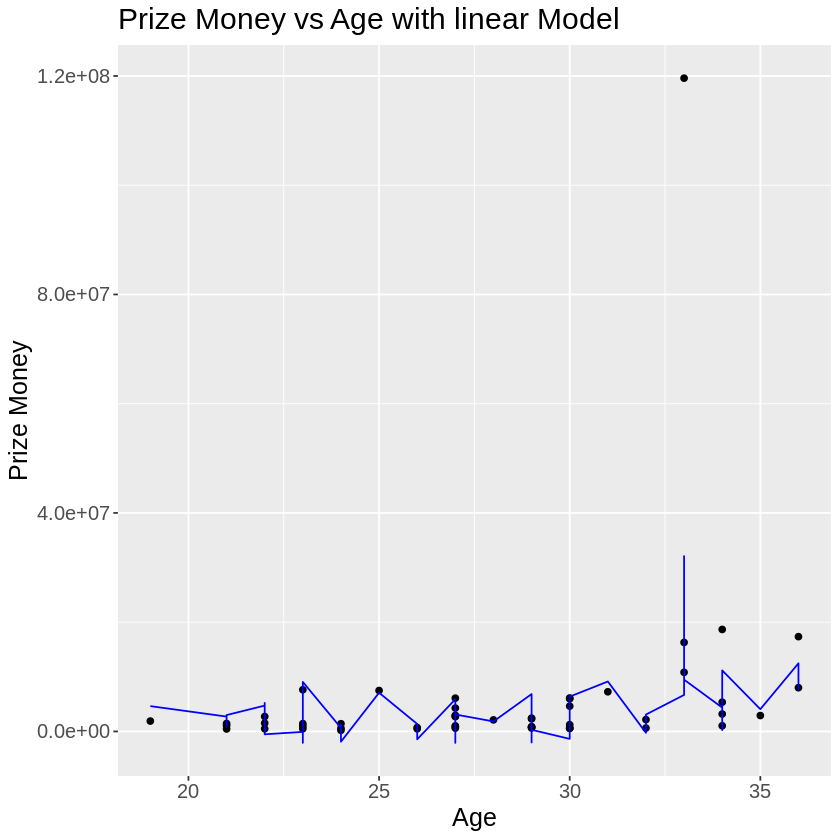

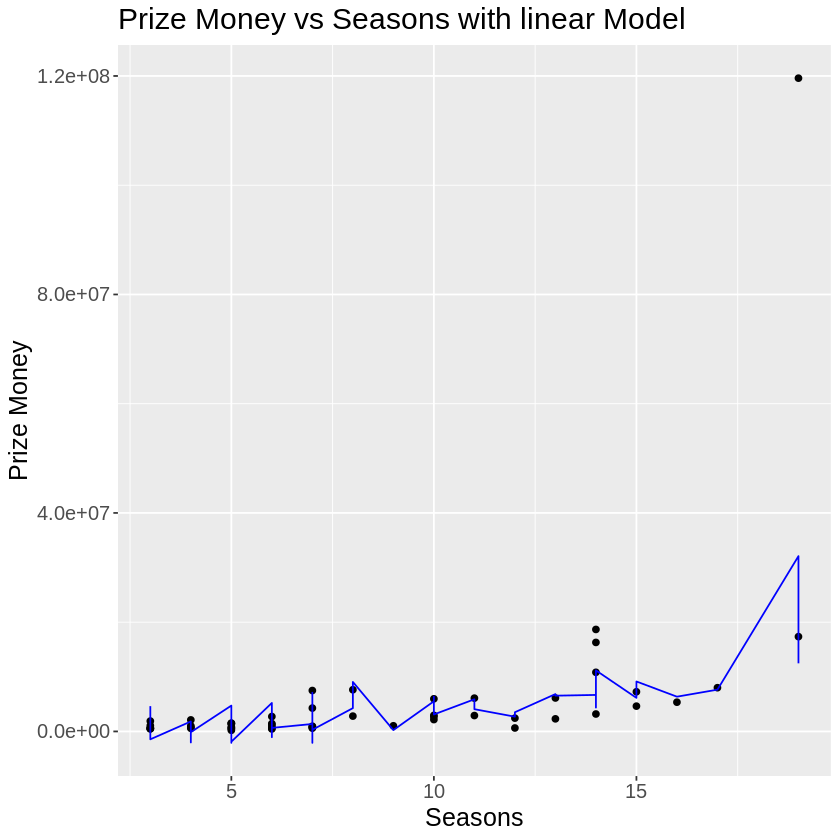

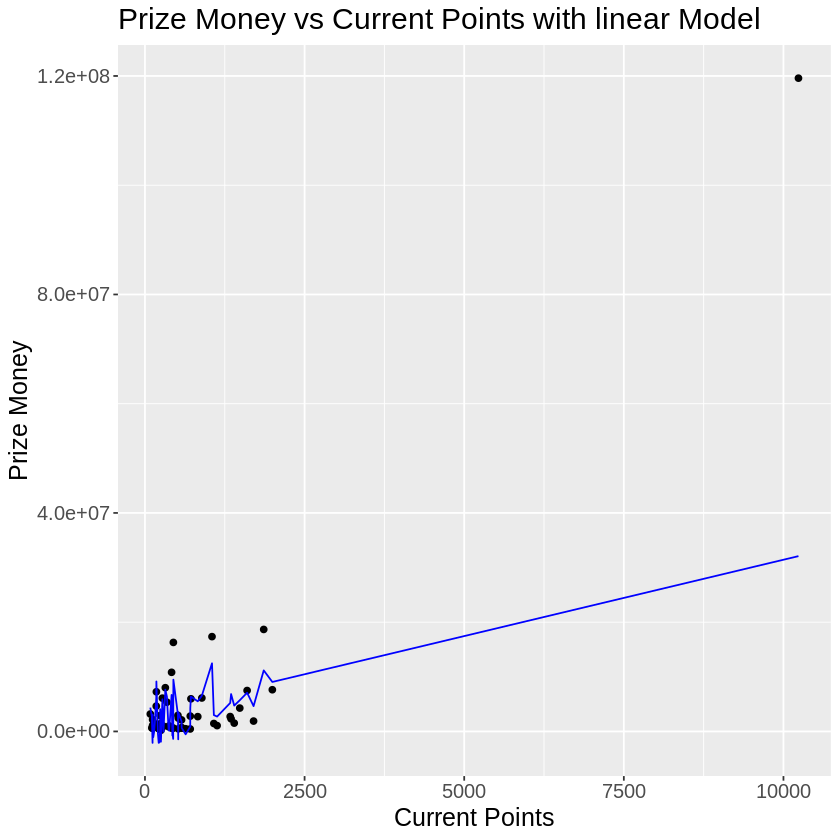

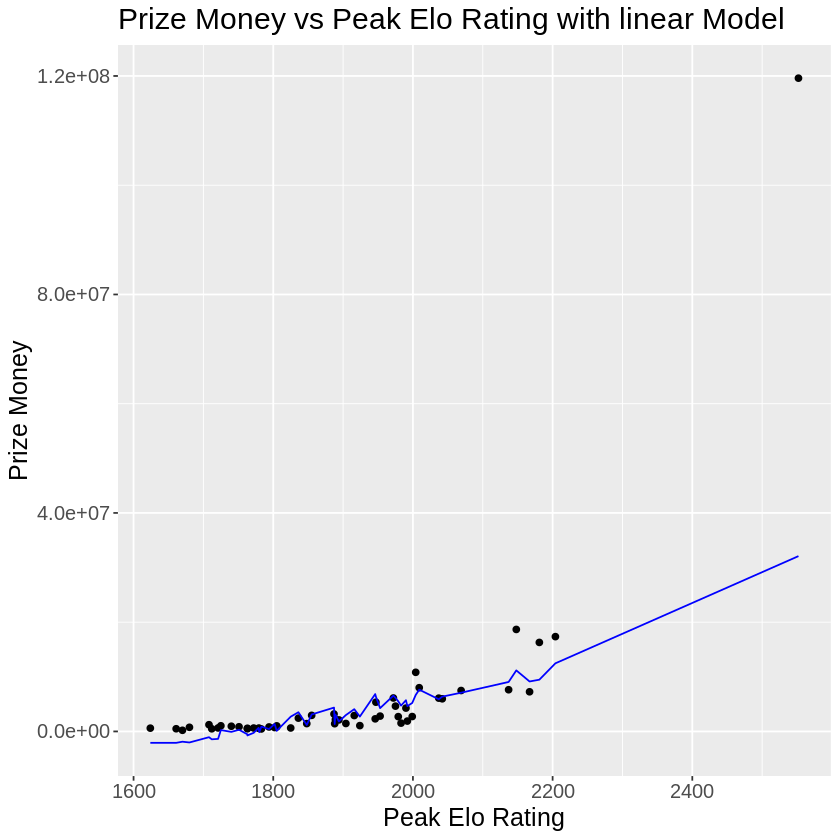

In [142]:
#Visualizing linear regression model on testing set
Age_linear_plot = ggplot(lm_test_table, aes(x=Age, y = Prize.Money))+
                geom_point()+
                geom_line(mapping = aes(x=Age, y = .pred), color = "blue")+
                labs(x="Age", y ="Prize Money", title = "Prize Money vs Age with linear Model") +
                theme(text = element_text(size = 15))
Age_linear_plot

Seasons_linear_plot = ggplot(lm_test_table, aes(x=Seasons, y = Prize.Money))+
                geom_point()+
                geom_line(mapping = aes(x=Seasons, y = .pred), color = "blue")+
                labs(x="Seasons", y ="Prize Money", title = "Prize Money vs Seasons with linear Model")+
                theme(text = element_text(size = 15))
Seasons_linear_plot
Current_Points_linear_plot = ggplot(lm_test_table, aes(x=Current.Points, y = Prize.Money))+
                geom_point()+
                geom_line(mapping = aes(x=Current.Points, y = .pred), color = "blue")+
                labs(x="Current Points", y ="Prize Money", title = "Prize Money vs Current Points with linear Model")+
                theme(text = element_text(size = 15))
Current_Points_linear_plot

Peak_Elo_Rating_linear_plot = ggplot(lm_test_table, aes(x=Peak.Elo.Rating, y = Prize.Money))+
                geom_point()+
                geom_line(mapping = aes(x=Peak.Elo.Rating, y = .pred), color = "blue")+
                labs(x="Peak Elo Rating", y ="Prize Money", title = "Prize Money vs Peak Elo Rating with linear Model")+
                theme(text = element_text(size = 15))
Peak_Elo_Rating_linear_plot


Prize Money = Age * 14,873 + Current Points * 1553 + Peak Elo Rating * 15523 + Seasons * 331702 - 30,210,098  
ex: Milos Raonic  
Age: 29  
Current Points: 2048  
Peak Elo Rating: 2269  
Seasons: 12  

Prize Money estimate: 12,603,874 USD  
Actual Amount: 18,879,855 USD


.pred,Prize.Money,Age,Current.Points,Peak.Elo.Rating,Seasons
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5883726,6091971,27,273,2037,11
4728377,1517157,22,1398,1983,5
4630703,1893476,19,1701,1992,3
⋮,⋮,⋮,⋮,⋮,⋮
3104364,2940388,27,516,1855,10
-1883617,205414,24,250,1670,5
-1444387,475660,26,521,1712,3


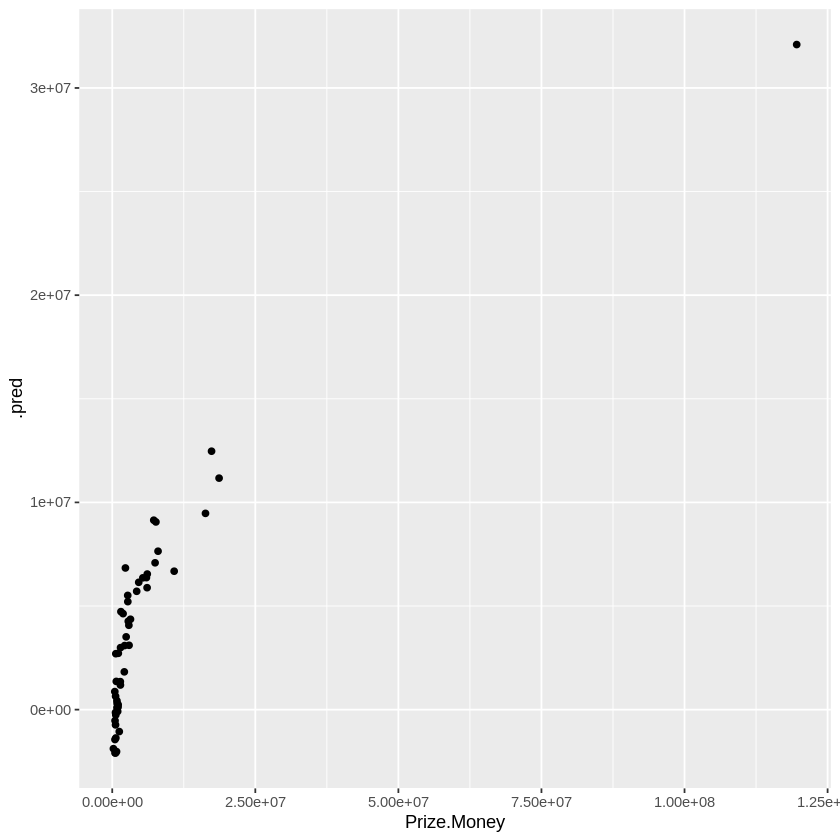

In [143]:
lm_test_table

lm_plot<-lm_test_table%>%
    ggplot(aes(x=Prize.Money,y=.pred))+
        geom_point()

lm_plot

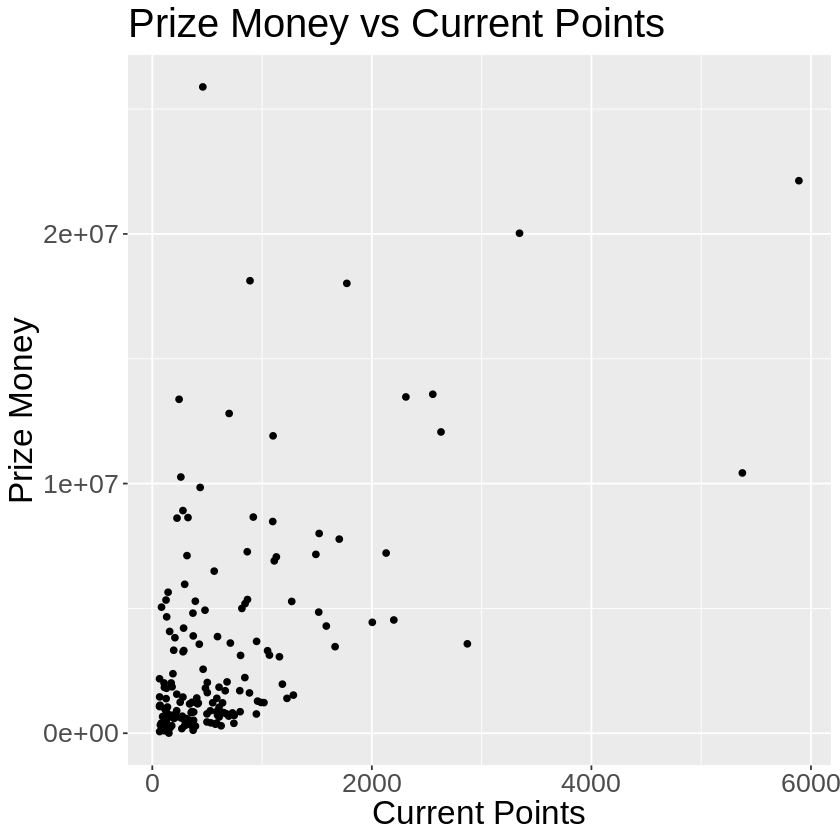

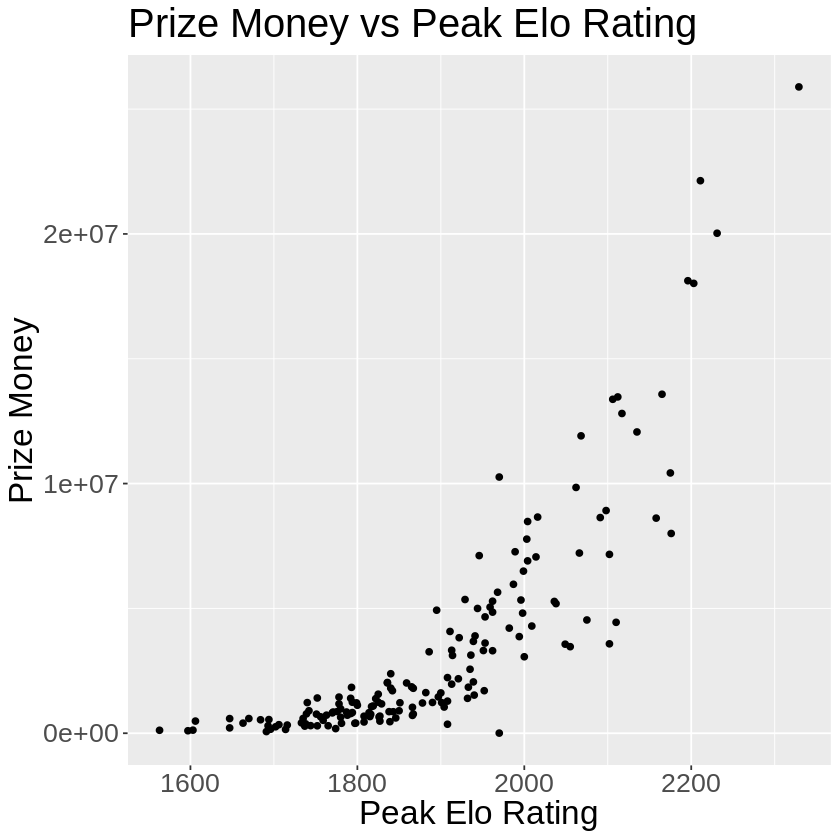

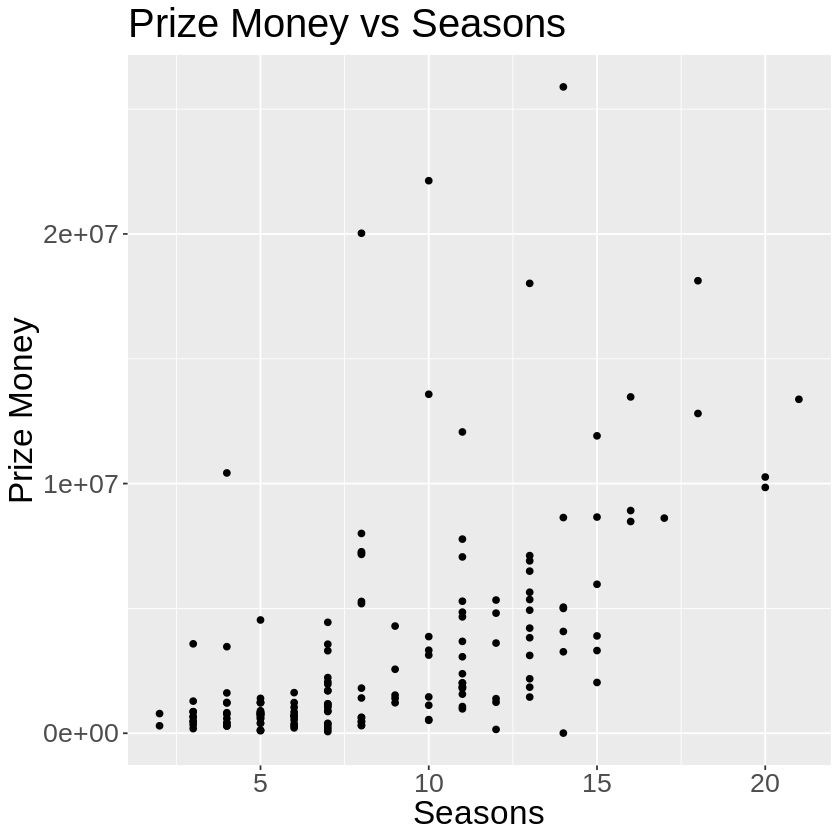

In [144]:
Current_Points_plot<-player_stats_training%>%
    ggplot(aes(x=Current.Points, y=Prize.Money))+
    geom_point() +
    labs(x="Current Points", y ="Prize Money", title = "Prize Money vs Current Points")+
    theme(text = element_text(size = 20))

# Current_Elo_Rating_plot<-player_stats_training%>%
#     ggplot(aes(x=Current.Elo.Rating, y=Prize.Money))+
#     geom_point() +
#     labs(x="Current Elo Rating", y ="Prize Money", title = "Prize Money vs Current Elo Rating")+
#     theme(text = element_text(size = 20))

Peak_Elo_Rating_plot<-player_stats_training%>%
    ggplot(aes(x=Peak.Elo.Rating, y=Prize.Money))+
    geom_point() +
    labs(x="Peak Elo Rating", y ="Prize Money", title = "Prize Money vs Peak Elo Rating")+
    theme(text = element_text(size = 20))

Seasons_plot<-player_stats_training%>%
    ggplot(aes(x=Seasons, y=Prize.Money))+
    geom_point() +
    labs(x="Seasons", y ="Prize Money", title = "Prize Money vs Seasons")+
    theme(text = element_text(size = 20))


Current_Points_plot


Peak_Elo_Rating_plot
Seasons_plot